# Does GDP Impact the Number of Sales of Electric Vehicles?

---

## Preparing the Environment for wbgapi

In [1]:
conda install wbgapi

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [105]:
# Importing required libraries
import os
import wbgapi as wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import linregress
from scipy import stats

## Retrieving GDP and Region Information from wbgapi

In [106]:
%%capture
wb.series.info(q='GDP')

- This is used to detemine the correct indicators for GDP and GDP Per Capita

In [107]:
%%capture
wb.region.info()

- This is used to find the correct lablels for the countries/region we will be using for this analysis.

## Creating Variables and DataFrames for analysis

In [108]:
# Assign variable to store the GDP current USD indicator code
gdp = 'NY.GDP.MKTP.CD'

# Assign variable to store the GDP per capita indicator code
gdp_per_capita = 'NY.GDP.PCAP.CD'

# Assign a list of regions
regions = ["AUS", "BEL", "BRA", "CAN", "CHL", "CHN", "DNK", "FIN", 
                                    "FRA", "DEU", "GRC", "ISL", "IND", "IDN", "ITA", "JPN", 
                                    "KOR", "MEX", "NLD", "NZL", "NOR", "POL", "PRT", "ZAF", 
                                    "ESP", "SWE", "CHE", "THA", "GBR", "USA"]

# Assign a list of years
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [109]:
# Create a dataframe with GDP data
gdp_df = wb.data.DataFrame(gdp, regions, time=years, labels = True)

# Reset the index and drop the old index
gdp_df.reset_index(drop=True, inplace=True)

# Rename the columns
gdp_df.columns=['region', 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Replace specific values in the 'region' column to match the other dataframes
gdp_df.replace(to_replace = ["United States", "Korea, Rep."], value = ["USA", "Korea"], inplace=True)

gdp_df

,region,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,USA,1.559973e+13,1.625397e+13,1.684319e+13,1.755068e+13,1.820602e+13,1.869511e+13,1.947734e+13,2.053306e+13,2.138098e+13,2.106047e+13,2.331508e+13
1,United Kingdom,2.666403e+12,2.706341e+12,2.786315e+12,3.065223e+12,2.934858e+12,2.699660e+12,2.683399e+12,2.878152e+12,2.857058e+12,2.704609e+12,3.131378e+12
2,Thailand,3.708191e+11,3.975582e+11,4.203332e+11,4.073395e+11,4.012964e+11,4.133662e+11,4.563570e+11,5.067546e+11,5.440811e+11,4.996818e+11,5.059470e+11
3,Switzerland,7.158881e+11,6.864202e+11,7.062349e+11,7.265378e+11,6.941182e+11,6.878955e+11,6.952008e+11,7.255687e+11,7.213691e+11,7.399136e+11,8.006402e+11
4,Sweden,5.740941e+11,5.524837e+11,5.868418e+11,5.819640e+11,5.051038e+11,5.156547e+11,5.410187e+11,5.554554e+11,5.338795e+11,5.470542e+11,6.356638e+11
5,Spain,1.480710e+12,1.324751e+12,1.355580e+12,1.371821e+12,1.196157e+12,1.233555e+12,1.313245e+12,1.421703e+12,1.394320e+12,1.276963e+12,1.427381e+12
6,South Africa,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.041597e+11,3.885320e+11,3.376197e+11,4.190150e+11
7,Portugal,2.451180e+11,2.162242e+11,2.264339e+11,2.299020e+11,1.993941e+11,2.064262e+11,2.213579e+11,2.423131e+11,2.399869e+11,2.290319e+11,2.536631e+11
8,Poland,5.243827e+11,4.952369e+11,5.157647e+11,5.390877e+11,4.771113e+11,4.700226e+11,5.246458e+11,5.887826e+11,5.960546e+11,5.994492e+11,6.794448e+11
9,Norway,4.982834e+11,5.095063e+11,5.227615e+11,4.984101e+11,3.858016e+11,3.688271e+11,3.983940e+11,4.369997e+11,4.049414e+11,3.621983e+11,4.821749e+11


In [110]:
# Create a dataframe with GDP per capita data
gdp_per_capita_df = wb.data.DataFrame(gdp_per_capita, regions, time=years, labels = True)

# Reset the index and drop the old index
gdp_per_capita_df.reset_index(drop=True, inplace=True)

# Rename the columns
gdp_per_capita_df.columns=['region', 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Replace specific values in the 'region' column to match the other dataframes
gdp_per_capita_df.replace(to_replace = ["United States", "Korea, Rep."], value = ["USA", "Korea"], inplace=True)

gdp_per_capita_df

,region,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,USA,50065.966504,51784.418574,53291.127689,55123.849787,56762.729452,57866.744934,59907.754261,62823.309438,65120.394663,63530.633484,70248.629000
1,United Kingdom,42150.698141,42485.586070,43449.091717,47447.588932,45071.074323,41146.077356,40621.334479,43306.308305,42747.080460,40318.557566,46510.282782
2,Thailand,5396.649426,5748.631241,6041.127460,5822.383699,5708.796925,5854.461088,6436.791746,7124.564544,7630.039610,6990.935503,7066.190546
3,Switzerland,90476.758965,85836.207677,87304.330581,88724.990940,83806.447600,82153.074545,82254.376927,85217.369151,84121.931030,85656.322666,91991.600458
4,Sweden,60755.759551,58037.821319,61126.943196,60020.360458,51545.483610,51965.157153,53791.508730,54589.060386,51939.429745,52837.903978,61028.738060
5,Spain,31677.900308,28322.946592,29077.182056,29513.651180,25754.361029,26537.159489,28185.321367,30379.721113,29581.518551,26959.675437,30103.513733
6,South Africa,8737.079774,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
7,Portugal,23217.295497,20563.713601,21653.195975,22103.700970,19250.106538,19991.972488,21490.429863,23562.554523,23330.817289,22242.406418,24567.509265
8,Poland,13776.611552,13010.923390,13558.414058,14182.137505,12560.051420,12378.759437,13815.621799,15504.580485,15699.911350,15816.989398,17999.909950
9,Norway,100600.562408,101524.141852,102913.450844,97019.182753,74355.515858,70460.560532,75496.754058,82267.809316,75719.752897,67329.677791,89154.276093


## Cleaning and formatting GDP and GDP Per Capita data for further analysis

In [111]:
# Melt the DataFrame to convert it into the long format
gdp_df = gdp_df.melt(id_vars='region', 
                     value_vars=[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], 
                     var_name='year', value_name='GDP (current US$)')

# Update the year and GDP (current US$) columns to int type
gdp_df['year'] = gdp_df['year'].astype(int)
gdp_df['GDP (current US$)'] = gdp_df['GDP (current US$)'].apply(int)

gdp_df


,region,year,GDP (current US$)
0,USA,2011,15599728123000
1,United Kingdom,2011,2666403005061
2,Thailand,2011,370819140946
3,Switzerland,2011,715888126682
4,Sweden,2011,574094112972
...,...,...,...
325,Chile,2021,317058508651
326,Canada,2021,1988336331717
327,Brazil,2021,1608981456325
328,Belgium,2021,594104177539


In [112]:
# Melt the DataFrame to convert it into the long format
gdp_per_capita_df = gdp_per_capita_df.melt(id_vars='region', 
                           value_vars=[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], 
                           var_name='year', value_name='GDP Per Capita (current US$)')

# Update the year and GDP Per Capita (current US$) column to int type
gdp_per_capita_df['year'] = gdp_per_capita_df['year'].astype(int)
gdp_per_capita_df['GDP Per Capita (current US$)'] = gdp_per_capita_df['GDP Per Capita (current US$)'].apply(int)

gdp_per_capita_df


,region,year,GDP Per Capita (current US$)
0,USA,2011,50065
1,United Kingdom,2011,42150
2,Thailand,2011,5396
3,Switzerland,2011,90476
4,Sweden,2011,60755
...,...,...,...
325,Chile,2021,16265
326,Canada,2021,51987
327,Brazil,2021,7507
328,Belgium,2021,51247


In [113]:
# Import and format EV Sales Data
ev_sales_df = pd.read_csv('EV_Sales_Data.csv')
ev_sales_df.rename(columns={'value': 'Number of EV Sold'}, inplace=True)
ev_sales_df['Number of EV Sold'] = ev_sales_df['Number of EV Sold'].apply(int)

# Reorder the columns
ev_sales_df = ev_sales_df[['region', 'year', 'Number of EV Sold']]

ev_sales_df

,region,year,Number of EV Sold
0,Belgium,2010,42
1,China,2010,3494
2,Denmark,2010,62
3,France,2010,998
4,Germany,2010,315
...,...,...,...
329,Spain,2021,70276
330,Sweden,2021,138771
331,Switzerland,2021,54891
332,USA,2021,631152


## Merge the 3 DataFrames in to One DataFrame

In [114]:
# Merge GDP and GDP per capita dataframes on region and year columns
merged_gdp_gdp_pc = pd.merge(gdp_df, gdp_per_capita_df, on=['region','year'])

# Merge EV sales dataframe on region and year columns
merged_df = pd.merge(merged_gdp_gdp_pc, ev_sales_df, on=['region','year'])

merged_df

,region,year,GDP (current US$),GDP Per Capita (current US$),Number of EV Sold
0,USA,2011,15599728123000,50065,17730
1,United Kingdom,2011,2666403005061,42150,1504
2,Switzerland,2011,715888126682,90476,436
3,Sweden,2011,574094112972,60755,187
4,Spain,2011,1480710495710,31677,418
...,...,...,...,...,...
297,Chile,2021,317058508651,16265,566
298,Canada,2021,1988336331717,51987,93152
299,Brazil,2021,1608981456325,7507,7254
300,Belgium,2021,594104177539,51247,71489


## Create Scatter Plots for All Regions

#### EV Sales vs. GDP - between 2011 and 2021

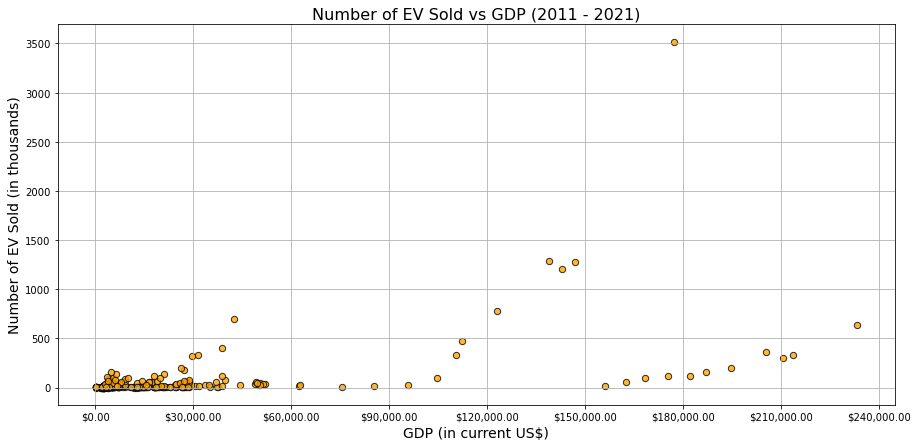

In [128]:
# Set the size of the plot
plt.figure(figsize=(15, 7))

# Build scatter plot for GDP vs. number of EV sold
plt.scatter(merged_df["GDP (current US$)"]/100000000, merged_df["Number of EV Sold"]/1000, 
            color='orange', edgecolor="black", linewidth=1, marker="o", alpha=0.8, s=40)

# Add title and axis labels
plt.title("Number of EV Sold vs GDP (2011 - 2021)", fontsize=16)
plt.xlabel("GDP (in current US$)", fontsize=14)
plt.ylabel("Number of EV Sold (in thousands)", fontsize=14)

plt.grid(True)

# Format x-axis as currency
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# Save the figures as PNG files
fig.savefig("Output/Number of EV Sold vs GDP (2011 - 2021)_SP.png")

# Show the plot
plt.show()


#### EV Sales vs. GDP Per Capita - between 2011 and 2021

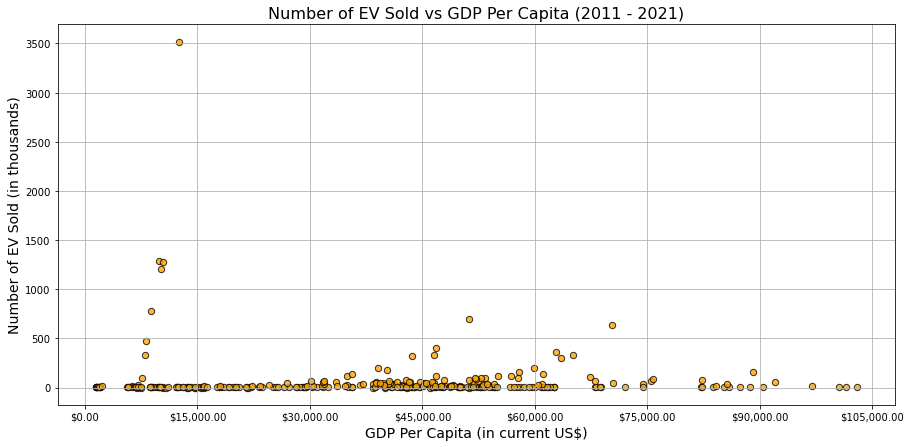

In [129]:
# Set the size of the plot
plt.figure(figsize=(15, 7))

# Build scatter plot for GDP Per Capita vs. number of EV sold
plt.scatter(merged_df["GDP Per Capita (current US$)"], merged_df["Number of EV Sold"]/1000, 
            color='orange', edgecolor="black", linewidth=1, marker="o", alpha=0.8, s=40)

# Add title and axis labels
plt.title("Number of EV Sold vs GDP Per Capita (2011 - 2021)", fontsize=16)
plt.xlabel("GDP Per Capita (in current US$)", fontsize=14)
plt.ylabel("Number of EV Sold (in thousands)", fontsize=14)

# Add grid
plt.grid(True)

# Format x-axis as currency
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# Save the figures as PNG files
fig.savefig("Output/Number of EV Sold vs GDP Per Capita (2011 - 2021)_SP.png")

# Show the plot
plt.show()


## Create Scatter Plots based for Specific Regions

#### Regions
---
- Australia
- USA
- China
- New Zealand

In [130]:
# Find the index of the row with the highest GDP value
max_gdp_index = merged_df['GDP (current US$)'].idxmax()

# Find the index of the row with the highest EV sales
max_ev_index = merged_df['Number of EV Sold'].idxmax()

# Select the row with the highest GDP value
max_gdp_row = merged_df.loc[max_gdp_index]

# Select the row with the highest EV sales
max_ev_row = merged_df.loc[max_ev_index]

# Print the details for the highest GDP value
print(f"First we chose \033[1m{max_gdp_row['region']}\033[0m since it has the highest overall GDP at \033[1m{max_gdp_row['GDP (current US$)']}\033[0m")

# Print the details for the highest EV sales
print(f"Then we chose \033[1m{max_ev_row['region']}\033[0m since it has the highest EV sales at \033[1m{max_ev_row['Number of EV Sold']}\033[0m")
      
print(f"Finally we chose \033[1mNew Zealand\033[0m since both Countries belong to the Oceania region and have many similarities") 

First we chose USA since it has the highest overall GDP at 23315080560000
Then we chose China since it has the highest EV sales at 3519053
Finally we chose New Zealand since both Countries belong to the Oceania region and have many similarities


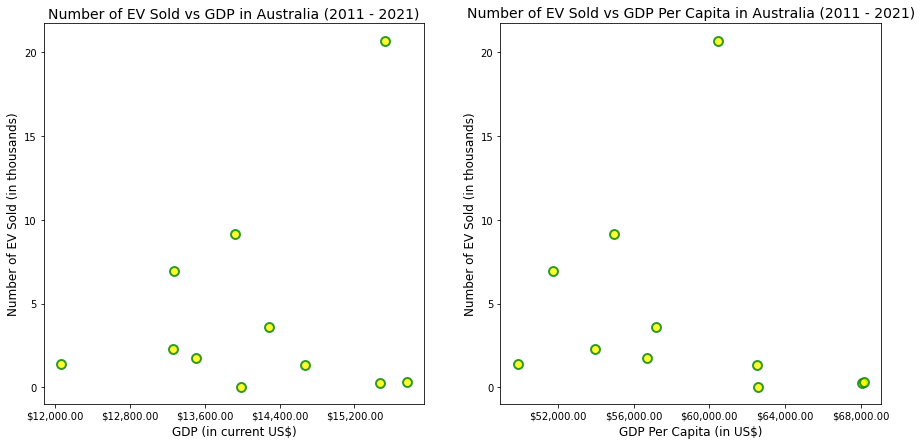

In [131]:
# Filter data for only Australia
australia_data = merged_df[merged_df["region"] == "Australia"]

# Set the size of the figure
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Build scatter plot for GDP vs. number of EV sold
ax[0].scatter(australia_data["GDP (current US$)"]/100000000, australia_data["Number of EV Sold"]/1000, 
            color='yellow', edgecolor="green", linewidth=2, marker="o", alpha=0.8, s=80)

# Add title and axis labels for the first plot
ax[0].set_title("Number of EV Sold vs GDP in Australia (2011 - 2021)", fontsize=14)
ax[0].set_xlabel("GDP (in current US$)", fontsize=12)
ax[0].set_ylabel("Number of EV Sold (in thousands)", fontsize=12)

# Format x-axis as currency
ax[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

# Build scatter plot for GDP Per Capita vs. number of EV sold
ax[1].scatter(australia_data["GDP Per Capita (current US$)"], australia_data["Number of EV Sold"]/1000, 
            color='yellow', edgecolor="green", linewidth=2, marker="o", alpha=0.8, s=80)

# Add title and axis labels for the second plot
ax[1].set_title("Number of EV Sold vs GDP Per Capita in Australia (2011 - 2021)", fontsize=14)
ax[1].set_xlabel("GDP Per Capita (in US$)", fontsize=12)
ax[1].set_ylabel("Number of EV Sold (in thousands)", fontsize=12)

# Format x-axis as currency
ax[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

# Save the figures as PNG files
# Save the figures as PNG files
fig.savefig("Output/Aus_SP.png")

plt.show()


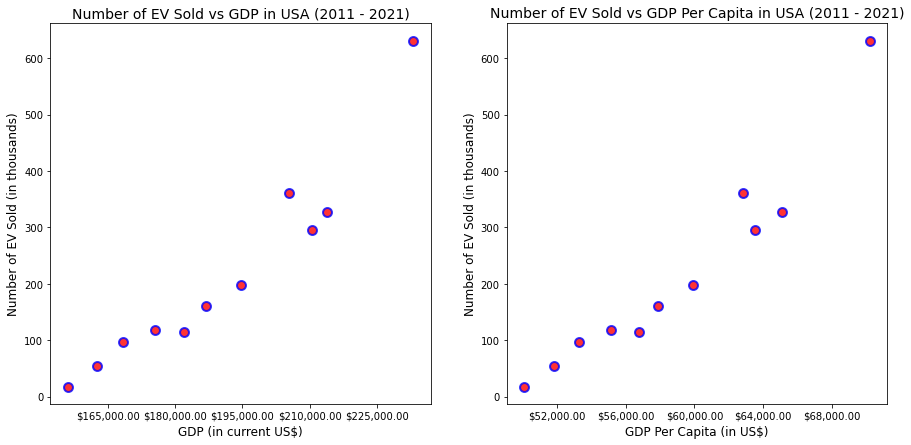

In [132]:
# Filter data for only USA
usa_data = merged_df[merged_df["region"] == "USA"]

# Set the size of the figure
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Build scatter plot for GDP vs. number of EV sold
ax[0].scatter(usa_data["GDP (current US$)"]/100000000, usa_data["Number of EV Sold"]/1000, 
            color='red', edgecolor="blue", linewidth=2, marker="o", alpha=0.8, s=80)

# Add title and axis labels for the first plot
ax[0].set_title("Number of EV Sold vs GDP in USA (2011 - 2021)", fontsize=14)
ax[0].set_xlabel("GDP (in current US$)", fontsize=12)
ax[0].set_ylabel("Number of EV Sold (in thousands)", fontsize=12)

# Format x-axis as currency
ax[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

# Build scatter plot for GDP Per Capita vs. number of EV sold
ax[1].scatter(usa_data["GDP Per Capita (current US$)"], usa_data["Number of EV Sold"]/1000, 
            color='red', edgecolor="blue", linewidth=2, marker="o", alpha=0.8, s=80)

# Add title and axis labels for the second plot
ax[1].set_title("Number of EV Sold vs GDP Per Capita in USA (2011 - 2021)", fontsize=14)
ax[1].set_xlabel("GDP Per Capita (in US$)", fontsize=12)
ax[1].set_ylabel("Number of EV Sold (in thousands)", fontsize=12)

# Format x-axis as currency
ax[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

# Save the figures as PNG files
# Save the figures as PNG files
fig.savefig("Output/USA_SP.png")

plt.show()


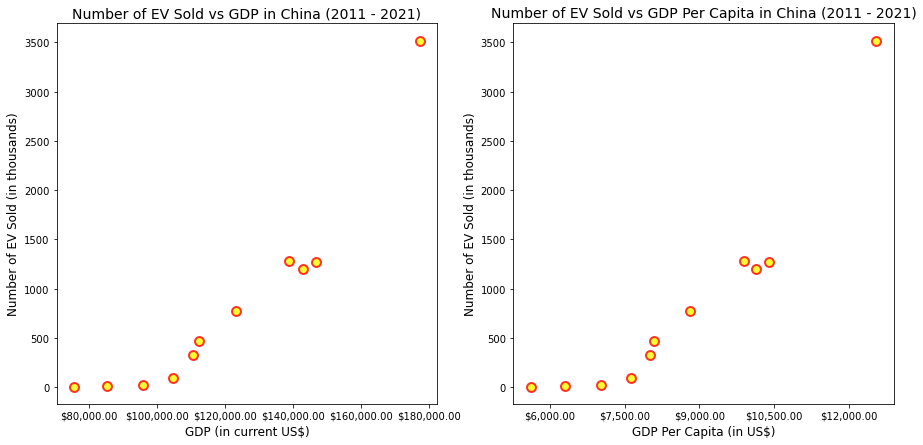

In [133]:
# Filter data for only China
china_data = merged_df[merged_df["region"] == "China"]

# Set the size of the figure
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Build scatter plot for GDP vs. number of EV sold
ax[0].scatter(china_data["GDP (current US$)"]/100000000, china_data["Number of EV Sold"]/1000, 
            color='yellow', edgecolor="red", linewidth=2, marker="o", alpha=0.8, s=80)

# Add title and axis labels for the first plot
ax[0].set_title("Number of EV Sold vs GDP in China (2011 - 2021)", fontsize=14)
ax[0].set_xlabel("GDP (in current US$)", fontsize=12)
ax[0].set_ylabel("Number of EV Sold (in thousands)", fontsize=12)

# Format x-axis as currency
ax[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

# Build scatter plot for GDP Per Capita vs. number of EV sold
ax[1].scatter(china_data["GDP Per Capita (current US$)"], china_data["Number of EV Sold"]/1000, 
            color='yellow', edgecolor="red", linewidth=2, marker="o", alpha=0.8, s=80)

# Add title and axis labels for the second plot
ax[1].set_title("Number of EV Sold vs GDP Per Capita in China (2011 - 2021)", fontsize=14)
ax[1].set_xlabel("GDP Per Capita (in US$)", fontsize=12)
ax[1].set_ylabel("Number of EV Sold (in thousands)", fontsize=12)

# Format x-axis as currency
ax[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

# Save the figures as PNG files
# Save the figures as PNG files
fig.savefig("Output/China_SP.png")

plt.show()


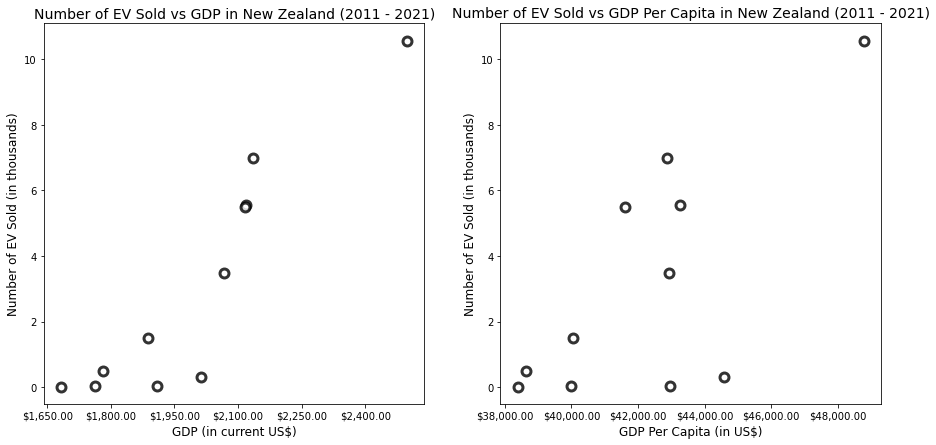

In [134]:
# Filter data for only New Zealand
new_zealand_data = merged_df[merged_df["region"] == "New Zealand"]

# Set the size of the figure
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Build scatter plot for GDP vs. number of EV sold
ax[0].scatter(new_zealand_data["GDP (current US$)"]/100000000, new_zealand_data["Number of EV Sold"]/1000, 
            color='white', edgecolor="black", linewidth=3, marker="o", alpha=0.8, s=80)

# Add title and axis labels for the first plot
ax[0].set_title("Number of EV Sold vs GDP in New Zealand (2011 - 2021)", fontsize=14)
ax[0].set_xlabel("GDP (in current US$)", fontsize=12)
ax[0].set_ylabel("Number of EV Sold (in thousands)", fontsize=12)

# Format x-axis as currency
ax[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

# Build scatter plot for GDP Per Capita vs. number of EV sold
ax[1].scatter(new_zealand_data["GDP Per Capita (current US$)"], new_zealand_data["Number of EV Sold"]/1000, 
            color='white', edgecolor="black", linewidth=3, marker="o", alpha=0.8, s=80)

# Add title and axis labels for the second plot
ax[1].set_title("Number of EV Sold vs GDP Per Capita in New Zealand (2011 - 2021)", fontsize=14)
ax[1].set_xlabel("GDP Per Capita (in US$)", fontsize=12)
ax[1].set_ylabel("Number of EV Sold (in thousands)", fontsize=12)

# Format x-axis as currency
ax[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

# Save the figures as PNG files
fig.savefig("Output/NZ_SP.png")

plt.show()

## Creating Linear Regression plots for Number of EV Sold

In [135]:

def lin_regress(x_values, y_values, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(15, 7))
    slope, intercept, r_value, _, _ = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    ax.scatter(x_values, y_values, s=80, color='orange', edgecolor="black", alpha=0.8)
    ax.plot(x_values, regress_values, "red", linewidth=2)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(labelsize=14)
    ax.set_title(title)
    print(f'The r-value is: {r_value}')
    plt.savefig(os.path.join("Output",title+'_RL.png'))
    plt.show()

####  Linear Regression for Number of EV Sold vs GDP - between 2011 and 2021

The r-value is: 0.5163696960442129


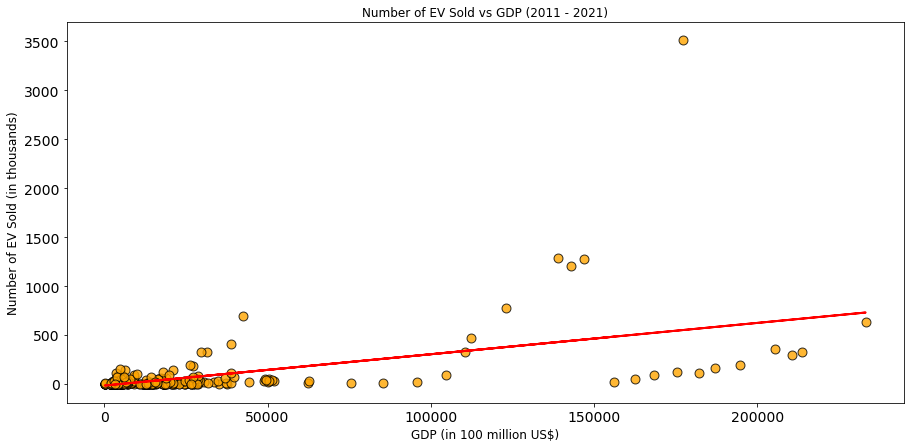

In [136]:
lin_regress(x_values = merged_df["GDP (current US$)"]/100000000, y_values = merged_df["Number of EV Sold"]/1000, 
            xlabel = "GDP (in 100 million US$)", ylabel = "Number of EV Sold (in thousands)",
            title="Number of EV Sold vs GDP (2011 - 2021)")

R-value of 0.516 means that about 51.6% of the variance in the number of EV sold can be explained by GDP. This indicates a moderate positive correlation between the two variables, meaning that as GDP increases, the number of EV sold also tends to increase.
However, other factors also influence the number of EV sold, and this correlation does not necessarily imply causation.

####  Linear Regression for Number of EV Sold vs GDP Per Capita - between 2011 and 2021

The r-value is: -0.0738958427267987


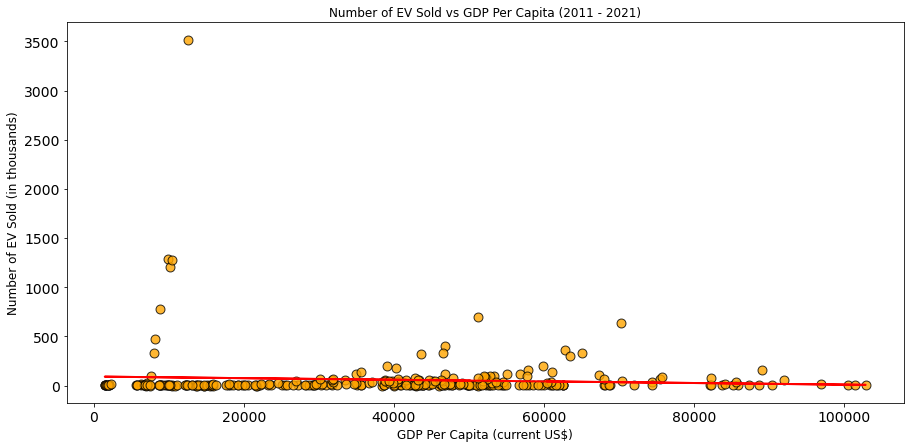

In [137]:
# Linear regression for Number of EV Sold vs GDP Per Capita
lin_regress(x_values = merged_df["GDP Per Capita (current US$)"], y_values = merged_df["Number of EV Sold"]/1000, 
            xlabel = "GDP Per Capita (current US$)", ylabel = "Number of EV Sold (in thousands)", 
            title = "Number of EV Sold vs GDP Per Capita (2011 - 2021)")

R-value of -0.073 means that about 0.073% of the variance in the number of EV sold can be explained by GDP per capita. This indicates a very weak negative correlation between the two variables, meaning that as GDP per capita increases, the number of EV sold tends to decrease.
However, other factors also influence the number of EV sold, and this correlation does not necessarily imply causation.

## Comparison of Australia's Linear Regression Plot to the Other Regions

In [138]:
def lin_regress(x_values, y_values, xlabel, ylabel, ax):
    slope, intercept, r_value, _, _ = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    ax.scatter(x_values, y_values, s=80, color='white', edgecolor="black", alpha=0.1)
    ax.plot(x_values, regress_values, "red", linewidth=2)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(labelsize=14)
    print(f'The r-value is: {r_value}')

#### Comparison of Linear Regresion of Australia and USA based on GDP 

The r-value is: 0.9495120918455304
The r-value is: 0.22743316857867818


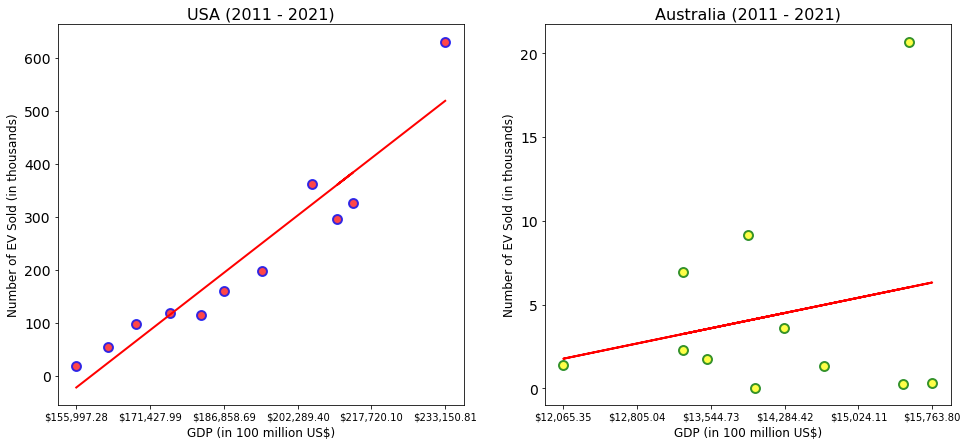

In [140]:
# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Filter data for only USA
usa_df = merged_df.loc[merged_df['region'] == 'USA']

# Plot USA data on the first subplot
ax1.scatter(usa_df["GDP (current US$)"]/100000000, usa_df["Number of EV Sold"]/1000, color='red', 
            edgecolor="blue", linewidth=2, marker="o", alpha=0.8, s=80)
ax1.set_xlabel("GDP (in 100 million US$)", fontsize=14)
ax1.set_title("USA (2011 - 2021)", fontsize=16)

# Linear regression for USA data
lin_regress(x_values = usa_df["GDP (current US$)"]/100000000, y_values = usa_df["Number of EV Sold"]/1000, 
            xlabel = "GDP (in 100 million US$)", ylabel = "Number of EV Sold (in thousands)", ax=ax1)

# Format x-axis as currency
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax1.set_xticks(np.linspace(min(usa_df["GDP (current US$)"]/100000000), max(usa_df["GDP (current US$)"]/100000000), 6))
ax1.tick_params(axis='x', labelsize=10)

# Filter data for only Australia
australia_df = merged_df.loc[merged_df['region'] == 'Australia']

# Plot Australia data on the second subplot
ax2.scatter(australia_df["GDP (current US$)"]/100000000, australia_df["Number of EV Sold"]/1000, color='yellow', 
            edgecolor="green", linewidth=2, marker="o", alpha=0.8, s=80)
ax2.set_title("Australia (2011 - 2021)", fontsize=16)

# Linear regression for Australia data
lin_regress(x_values = australia_df["GDP (current US$)"]/100000000, y_values = australia_df["Number of EV Sold"]/1000, 
            xlabel = "GDP (in 100 million US$)", ylabel = "Number of EV Sold (in thousands)", ax=ax2)

# Format x-axis as currency
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax2.set_xticks(np.linspace(min(australia_df["GDP (current US$)"]/100000000), max(australia_df["GDP (current US$)"]/100000000), 6))
ax2.tick_params(axis='x', labelsize=10)

# Save the figures as PNG files
fig.savefig("Output/GDP_USAvAUS_RL.png")

plt.show()

#### Comparison of Linear Regresion of Australia and China based on Number of EV Sold vs GDP 

The r-value is: 0.9203470704265847
The r-value is: 0.22743316857867818


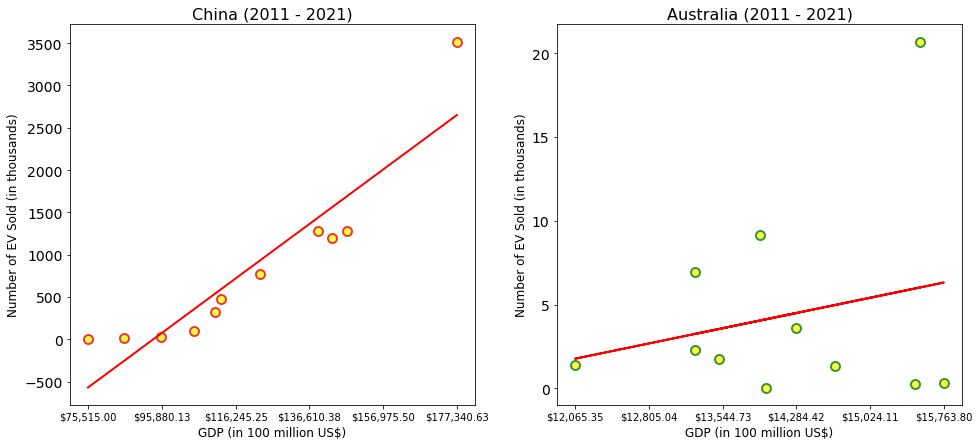

In [141]:
# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Filter data for only China
china_df = merged_df.loc[merged_df['region'] == 'China']

# Plot China data on the first subplot
ax1.scatter(china_df["GDP (current US$)"]/100000000, china_df["Number of EV Sold"]/1000, color='yellow', 
            edgecolor="red", linewidth=2, marker="o", alpha=0.8, s=80)
ax1.set_xlabel("GDP (in 100 million US$)", fontsize=14)
ax1.set_title("China (2011 - 2021)", fontsize=16)

# Linear regression for China data
lin_regress(x_values = china_df["GDP (current US$)"]/100000000, y_values = china_df["Number of EV Sold"]/1000, 
            xlabel = "GDP (in 100 million US$)", ylabel = "Number of EV Sold (in thousands)", ax=ax1)

# Format x-axis as currency
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax1.set_xticks(np.linspace(min(china_df["GDP (current US$)"]/100000000), max(china_df["GDP (current US$)"]/100000000), 6))
ax1.tick_params(axis='x', labelsize=10)

# Filter data for only Australia
australia_df = merged_df.loc[merged_df['region'] == 'Australia']

# Plot Australia data on the second subplot
ax2.scatter(australia_df["GDP (current US$)"]/100000000, australia_df["Number of EV Sold"]/1000, color='yellow', 
            edgecolor="green", linewidth=2, marker="o", alpha=0.8, s=80)
ax2.set_title("Australia (2011 - 2021)", fontsize=16)

# Linear regression for Australia data
lin_regress(x_values = australia_df["GDP (current US$)"]/100000000, y_values = australia_df["Number of EV Sold"]/1000, 
            xlabel = "GDP (in 100 million US$)", ylabel = "Number of EV Sold (in thousands)", ax=ax2)

# Format x-axis as currency
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax2.set_xticks(np.linspace(min(australia_df["GDP (current US$)"]/100000000), max(australia_df["GDP (current US$)"]/100000000), 6))
ax2.tick_params(axis='x', labelsize=10)

# Save the figures as PNG files
fig.savefig("Output/GDP_ChinavAUS_RL.png")

plt.show()

#### Comparison of Linear Regresion of Australia and New Zealand based on Number of EV Sold vs GDP 

The r-value is: 0.9196915254630951
The r-value is: 0.22743316857867818


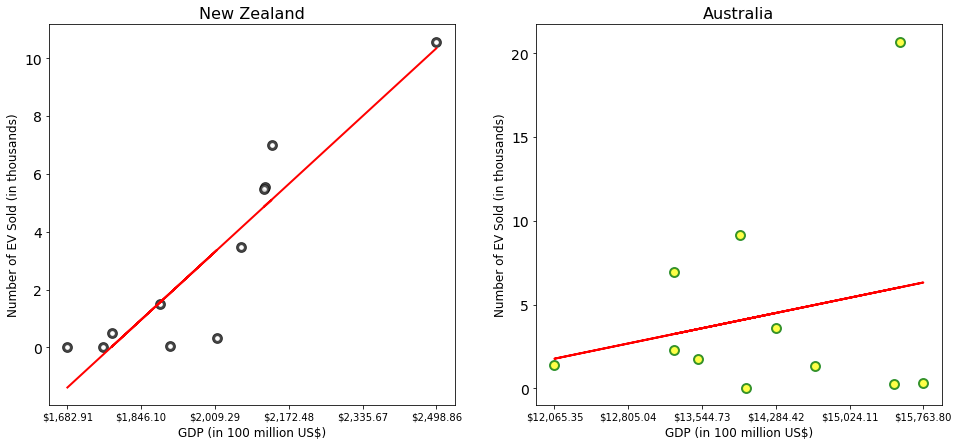

In [142]:
#Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

#Filter data for only New Zealand
nz_df = merged_df.loc[merged_df['region'] == 'New Zealand']

#Plot New Zealand data on the first subplot
ax1.scatter(nz_df["GDP (current US$)"]/100000000, nz_df["Number of EV Sold"]/1000, color='white', 
            edgecolor="black", linewidth=3, marker="o", alpha=0.8, s=60)
ax1.set_ylabel("Number of EV Sold (in thousands)", fontsize=14)
ax1.set_xlabel("GDP (in 100 million US$)", fontsize=14)
ax1.set_title("New Zealand", fontsize=16)
lin_regress(x_values = nz_df["GDP (current US$)"]/100000000, y_values = nz_df["Number of EV Sold"]/1000, 
            xlabel = "GDP (in 100 million US$)", ylabel = "Number of EV Sold (in thousands)", ax=ax1)

# Format x-axis as currency
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax1.set_xticks(np.linspace(min(nz_df["GDP (current US$)"]/100000000), max(nz_df["GDP (current US$)"]/100000000), 6))
ax1.tick_params(axis='x', labelsize=10)

#Filter data for only Australia
australia_df = merged_df.loc[merged_df['region'] == 'Australia']

#Plot Australia data on the second subplot
ax2.scatter(australia_df["GDP (current US$)"]/100000000, australia_df["Number of EV Sold"]/1000, color='yellow', 
            edgecolor="green", linewidth=2, marker="o", alpha=0.8, s=80)
# ax2.set_ylabel("Number of EV Sold (in thousands)", fontsize=14)
# ax2.set_xlabel("GDP (in 100 million US$)", fontsize=14)
ax2.set_title("Australia", fontsize=16)
lin_regress(x_values = australia_df["GDP (current US$)"]/100000000, y_values = australia_df["Number of EV Sold"]/1000, 
            xlabel = "GDP (in 100 million US$)", ylabel = "Number of EV Sold (in thousands)", ax=ax2)

# Format x-axis as currency
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax2.set_xticks(np.linspace(min(australia_df["GDP (current US$)"]/100000000), max(australia_df["GDP (current US$)"]/100000000), 6))
ax2.tick_params(axis='x', labelsize=10)

# Save the figures as PNG files
fig.savefig("Output/GDP_NZvAUS_RL.png")

plt.show()

Based on the above r-values, it appears that the correlation between the number of electric vehicles (EVs) sold and GDP is strongest in the United States, China, and New Zealand. In all three of these regions, the r-value is above 0.9, indicating a strong positive correlation between the two variables. This suggests that as GDP increases, so does the number of EVs sold in these regions.

In contrast, the correlation in Australia is much weaker, with an r-value of only 0.2274. This suggests that there is a weak relationship between GDP and the number of EVs sold in Australia. It is possible that other factors, such as government incentives, consumer preferences, or infrastructure availability may be more influential in determining the number of EVs sold in this region.

Additionally, the data does not indicate causality, meaning that a strong correlation does not necessarily mean that GDP causes increased EV sales.

#### Comparison of Linear Regresion of Australia and USA based on GDP Pre Capita 

The r-value is: 0.9563773914909699
The r-value is: -0.18534688003467817


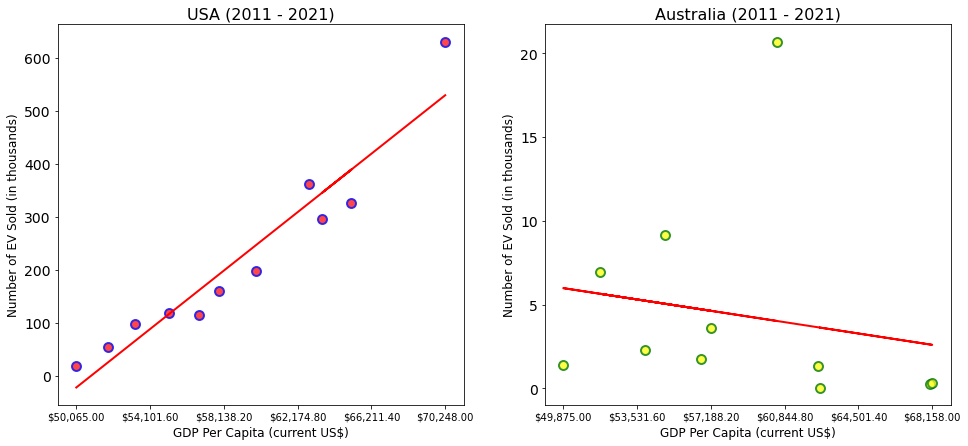

In [143]:
# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Filter data for only USA
usa_df = merged_df.loc[merged_df['region'] == 'USA']

# Plot USA data on the first subplot
ax1.scatter(usa_df["GDP Per Capita (current US$)"], usa_df["Number of EV Sold"]/1000, color='red', 
            edgecolor="blue", linewidth=2, marker="o", alpha=0.8, s=80)
ax1.set_xlabel("GDP Per Capita (current US$)", fontsize=14)
ax1.set_title("USA (2011 - 2021)", fontsize=16)

# Linear regression for USA data
lin_regress(x_values = usa_df["GDP Per Capita (current US$)"], y_values = usa_df["Number of EV Sold"]/1000, 
            xlabel = "GDP Per Capita (current US$)", ylabel = "Number of EV Sold (in thousands)", ax=ax1)

# Format x-axis as currency
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax1.set_xticks(np.linspace(min(usa_df["GDP Per Capita (current US$)"]), max(usa_df["GDP Per Capita (current US$)"]), 6))
ax1.tick_params(axis='x', labelsize=10)

# Filter data for only Australia
australia_df = merged_df.loc[merged_df['region'] == 'Australia']

# Plot Australia data on the second subplot
ax2.scatter(australia_df["GDP Per Capita (current US$)"], australia_df["Number of EV Sold"]/1000, color='yellow', 
            edgecolor="green", linewidth=2, marker="o", alpha=0.8, s=80)
ax2.set_title("Australia (2011 - 2021)", fontsize=16)

# Linear regression for Australia data
lin_regress(x_values = australia_df["GDP Per Capita (current US$)"], y_values = australia_df["Number of EV Sold"]/1000, 
            xlabel = "GDP Per Capita (current US$)", ylabel = "Number of EV Sold (in thousands)", ax=ax2)

# Format x-axis as currency
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax2.set_xticks(np.linspace(min(australia_df["GDP Per Capita (current US$)"]), max(australia_df["GDP Per Capita (current US$)"]), 6))
ax2.tick_params(axis='x', labelsize=10)

# Save the figures as PNG files
fig.savefig("Output/GDPPC_USAvAUS_RL.png")

plt.show()

#### Comparison of Linear Regresion of Australia and China based on GDP Pre Capita 

The r-value is: 0.9230877916337635
The r-value is: -0.18534688003467817


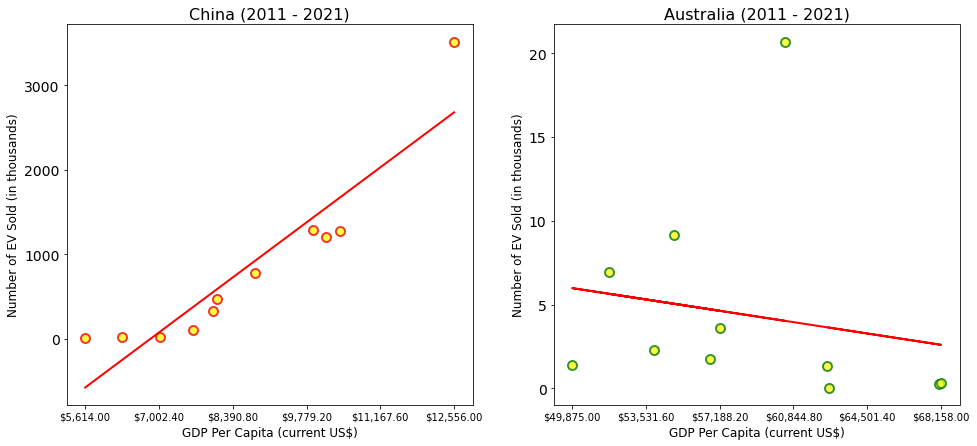

In [144]:
# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Filter data for only China
china_df = merged_df.loc[merged_df['region'] == 'China']

# Plot China data on the first subplot
ax1.scatter(china_df["GDP Per Capita (current US$)"], china_df["Number of EV Sold"]/1000, color='yellow', 
            edgecolor="red", linewidth=2, marker="o", alpha=0.8, s=80)
ax1.set_xlabel("GDP Per Capita (current US$)", fontsize=14)
ax1.set_title("China (2011 - 2021)", fontsize=16)

# Linear regression for China data
lin_regress(x_values = china_df["GDP Per Capita (current US$)"], y_values = china_df["Number of EV Sold"]/1000, 
            xlabel = "GDP Per Capita (current US$)", ylabel = "Number of EV Sold (in thousands)", ax=ax1)

# Format x-axis as currency
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax1.set_xticks(np.linspace(min(china_df["GDP Per Capita (current US$)"]), max(china_df["GDP Per Capita (current US$)"]), 6))
ax1.tick_params(axis='x', labelsize=10)

# Filter data for only Australia
australia_df = merged_df.loc[merged_df['region'] == 'Australia']

# Plot Australia data on the second subplot
ax2.scatter(australia_df["GDP Per Capita (current US$)"], australia_df["Number of EV Sold"]/1000, color='yellow', 
            edgecolor="green", linewidth=2, marker="o", alpha=0.8, s=80)
ax2.set_title("Australia (2011 - 2021)", fontsize=16)

# Linear regression for Australia data
lin_regress(x_values = australia_df["GDP Per Capita (current US$)"], y_values = australia_df["Number of EV Sold"]/1000, 
            xlabel = "GDP Per Capita (current US$)", ylabel = "Number of EV Sold (in thousands)", ax=ax2)

# Format x-axis as currency
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax2.set_xticks(np.linspace(min(australia_df["GDP Per Capita (current US$)"]), max(australia_df["GDP Per Capita (current US$)"]), 6))
ax2.tick_params(axis='x', labelsize=10)

# Save the figures as PNG files
fig.savefig("Output/GDPPC_ChinavAUS_RL.png")

plt.show()


The r-value is: 0.7076567931098798
The r-value is: -0.18534688003467817


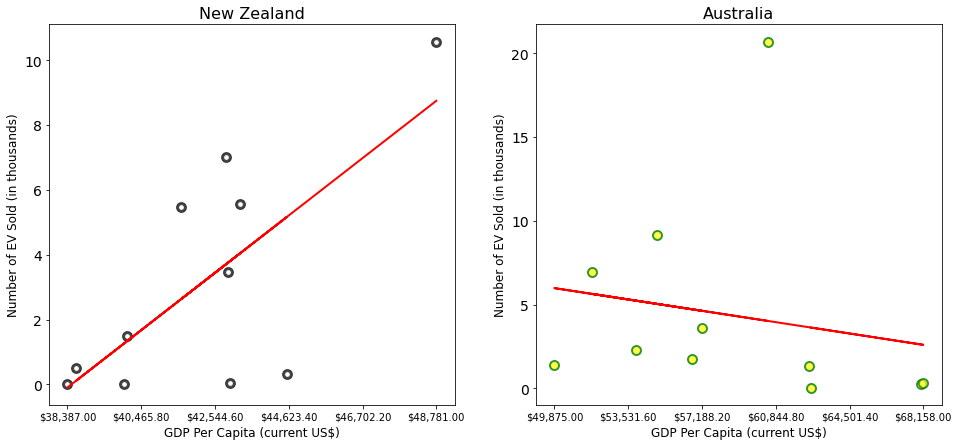

In [145]:
# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Filter data for only New Zealand
nz_df = merged_df.loc[merged_df['region'] == 'New Zealand']

# Plot New Zealand data on the first subplot
ax1.scatter(nz_df["GDP Per Capita (current US$)"], nz_df["Number of EV Sold"]/1000, color='white', 
            edgecolor="black", linewidth=3, marker="o", alpha=0.8, s=60)
ax1.set_ylabel("Number of EV Sold (in thousands)", fontsize=14)
ax1.set_xlabel("GDP Per Capita (current US$)", fontsize=14)
ax1.set_title("New Zealand", fontsize=16)
lin_regress(x_values = nz_df["GDP Per Capita (current US$)"], y_values = nz_df["Number of EV Sold"]/1000, 
            xlabel = "GDP Per Capita (current US$)", ylabel = "Number of EV Sold (in thousands)", ax=ax1)

# Format x-axis as currency
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax1.set_xticks(np.linspace(min(nz_df["GDP Per Capita (current US$)"]), max(nz_df["GDP Per Capita (current US$)"]), 6))
ax1.tick_params(axis='x', labelsize=10)

# Format x-axis as currency
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax1.set_xticks(np.linspace(min(nz_df["GDP Per Capita (current US$)"]), max(nz_df["GDP Per Capita (current US$)"]), 6))
ax1.tick_params(axis='x', labelsize=10)

# Filter data for only Australia
australia_df = merged_df.loc[merged_df['region'] == 'Australia']

# Plot Australia data on the second subplot
ax2.scatter(australia_df["GDP Per Capita (current US$)"], australia_df["Number of EV Sold"]/1000, color='yellow', 
            edgecolor="green", linewidth=2, marker="o", alpha=0.8, s=80)
# ax2.set_ylabel("Number of EV Sold (in thousands)", fontsize=14)
# ax2.set_xlabel("GDP per Capita (current US$)", fontsize=14)
ax2.set_title("Australia", fontsize=16)
lin_regress(x_values = australia_df["GDP Per Capita (current US$)"], y_values = australia_df["Number of EV Sold"]/1000, 
            xlabel = "GDP Per Capita (current US$)", ylabel = "Number of EV Sold (in thousands)", ax=ax2)

# Format x-axis as currency
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
ax2.set_xticks(np.linspace(min(australia_df["GDP Per Capita (current US$)"]), max(australia_df["GDP Per Capita (current US$)"]), 6))
ax2.tick_params(axis='x', labelsize=10)

# Save the figures as PNG files
fig.savefig("Output/GDPPC_NZvAUS_RL.png")

plt.show()

Based on the above R-values, the relationship between Number of EV Sold and GDP Per Capita is strongest for USA and China with R-values of 0.956 and 0.923 respectively. This suggests that as GDP Per Capita increases in these countries, the number of EV sold also increases in a strong and positive correlation. It can be concluded that there is a strong positive correlation between "Number of EV Sold" and "GDP Per Capita" for USA and China. This suggests that as GDP Per Capita increases in these countries, the number of EV sold also increases. 

The relationship is moderate for New Zealand with R-value of 0.707. This suggests that as GDP Per Capita increases in New Zealand, the number of EV sold also increases, but the correlation is not as strong as it is in China and USA.

On the other hand, The relationship is weak and negative for Australia with R-value of -0.185. This suggests that as GDP Per Capita increases in Australia, the number of EV sold decreases in a weak and negative correlation.

It is important to note that correlation does not imply causation, and other factors may also be affecting EV sales in these countries. 